# Análisis de incidentes viales en la ciudad de México.

La ciudad de México es una de las ciudades mas pobladas del mundo donde la vialidad automovilistica provoca grandes problemas.

El objetivo de este analizis es poder prevenir accidentes viales y disminuir las consecuencias que estos pueden tener con base a las fechas, horas, localizacion y delegaciones donde sucedieron accidentes en los ultimos 4 años en la ciudad de México.

Estos datos fueron recopilados del portal de datos de la ciudad de México:https://datos.cdmx.gob.mx/explore/dataset/incidentes-viales-c5/table/


## Primero cargamos los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('incidentes-viales-c5.csv', sep=";")
data.head()


folio fecha_creacion hora_creacion dia_semana  \
0  C5/170620/02458     20/06/2017      11:29:14     Martes   
1  C5/170620/01666     20/06/2017      09:16:50     Martes   
2  C5/170620/01543     20/06/2017      08:56:06     Martes   
3  C5/170620/06228     20/06/2017      20:18:20     Martes   
4  C5/170620/03712     20/06/2017      14:41:40     Martes   

                                       codigo_cierre fecha_cierre  año_cierre  \
0  (F) El operador/a o despachador/a identifican,...   20/06/2017        2017   
1  (F) El operador/a o despachador/a identifican,...   20/06/2017        2017   
2  (D) El incidente reportado se registró en dos ...   20/06/2017        2017   
3  (D) El incidente reportado se registró en dos ...   20/06/2017        2017   
4  (D) El incidente reportado se registró en dos ...   20/06/2017        2017   

  mes_cierre hora_cierre delegacion_inicio                     incidente_c4  \
0      Junio    11:42:05        IZTAPALAPA  accidente-choque sin lesionados   
1      Junio    09:30:41    MIGUEL HIDALGO  accidente-choque sin lesionados   
2      Junio    09:12:14    MIGUEL HIDALGO  accidente-choque con lesionados   
3      Junio    20:33:25        CUAJIMALPA  accidente-choque sin lesionados   
4      Junio    14:45:09        CUAUHTEMOC  accidente-choque con lesionados   

     latitud   longitud  clas_con_f_alarma     tipo_entrada delegacion_cierre  \
0  19.372892 -99.017403       FALSA ALARMA  LLAMADA DEL 911        IZTAPALAPA   
1  19.405190 -99.202390       FALSA ALARMA  LLAMADA DEL 911    MIGUEL HIDALGO   
2  19.443950 -99.166440  URGENCIAS MEDICAS  LLAMADA DEL 911    MIGUEL HIDALGO   
3  19.359770 -99.289230         EMERGENCIA  LLAMADA DEL 911        CUAJIMALPA   
4  19.418855 -99.143494  URGENCIAS MEDICAS  LLAMADA DEL 911        CUAUHTEMOC   

                   geopoint  mes  
0  19.37289238,-99.01740265    6  
1  19.40518998,-99.20238984    6  
2  19.44395001,-99.16643988    6  
3  19.35977004,-99.28923012    6  
4  19.41885486,-99.14349417    6

In [2]:
data.shape

(1206191, 18)

### Tenemos 1206191 registros, pero ahora limpiaremos un poco los datos que tenemos...

In [3]:
data.head()

folio fecha_creacion hora_creacion dia_semana  \
0  C5/170620/02458     20/06/2017      11:29:14     Martes   
1  C5/170620/01666     20/06/2017      09:16:50     Martes   
2  C5/170620/01543     20/06/2017      08:56:06     Martes   
3  C5/170620/06228     20/06/2017      20:18:20     Martes   
4  C5/170620/03712     20/06/2017      14:41:40     Martes   

                                       codigo_cierre fecha_cierre  año_cierre  \
0  (F) El operador/a o despachador/a identifican,...   20/06/2017        2017   
1  (F) El operador/a o despachador/a identifican,...   20/06/2017        2017   
2  (D) El incidente reportado se registró en dos ...   20/06/2017        2017   
3  (D) El incidente reportado se registró en dos ...   20/06/2017        2017   
4  (D) El incidente reportado se registró en dos ...   20/06/2017        2017   

  mes_cierre hora_cierre delegacion_inicio                     incidente_c4  \
0      Junio    11:42:05        IZTAPALAPA  accidente-choque sin lesionados   
1      Junio    09:30:41    MIGUEL HIDALGO  accidente-choque sin lesionados   
2      Junio    09:12:14    MIGUEL HIDALGO  accidente-choque con lesionados   
3      Junio    20:33:25        CUAJIMALPA  accidente-choque sin lesionados   
4      Junio    14:45:09        CUAUHTEMOC  accidente-choque con lesionados   

     latitud   longitud  clas_con_f_alarma     tipo_entrada delegacion_cierre  \
0  19.372892 -99.017403       FALSA ALARMA  LLAMADA DEL 911        IZTAPALAPA   
1  19.405190 -99.202390       FALSA ALARMA  LLAMADA DEL 911    MIGUEL HIDALGO   
2  19.443950 -99.166440  URGENCIAS MEDICAS  LLAMADA DEL 911    MIGUEL HIDALGO   
3  19.359770 -99.289230         EMERGENCIA  LLAMADA DEL 911        CUAJIMALPA   
4  19.418855 -99.143494  URGENCIAS MEDICAS  LLAMADA DEL 911        CUAUHTEMOC   

                   geopoint  mes  
0  19.37289238,-99.01740265    6  
1  19.40518998,-99.20238984    6  
2  19.44395001,-99.16643988    6  
3  19.35977004,-99.28923012    6  
4  19.41885486,-99.14349417    6

In [4]:
data.count()

folio                1206191
fecha_creacion       1206191
hora_creacion        1206191
dia_semana           1206191
codigo_cierre        1206191
fecha_cierre         1206191
año_cierre           1206191
mes_cierre           1206191
hora_cierre          1206191
delegacion_inicio    1206047
incidente_c4         1206191
latitud              1205748
longitud             1205756
clas_con_f_alarma    1206191
tipo_entrada         1206191
delegacion_cierre    1206065
geopoint             1205745
mes                  1206191
dtype: int64

### Reviso los datos nulos

In [5]:
col_names = data.columns.tolist()

for column in col_names:
    print ("Valores nulos en <{0}>: {1}".format(column, data[column].isnull().sum()))

Valores nulos en <folio>: 0
Valores nulos en <fecha_creacion>: 0
Valores nulos en <hora_creacion>: 0
Valores nulos en <dia_semana>: 0
Valores nulos en <codigo_cierre>: 0
Valores nulos en <fecha_cierre>: 0
Valores nulos en <año_cierre>: 0
Valores nulos en <mes_cierre>: 0
Valores nulos en <hora_cierre>: 0
Valores nulos en <delegacion_inicio>: 144
Valores nulos en <incidente_c4>: 0
Valores nulos en <latitud>: 443
Valores nulos en <longitud>: 435
Valores nulos en <clas_con_f_alarma>: 0
Valores nulos en <tipo_entrada>: 0
Valores nulos en <delegacion_cierre>: 126
Valores nulos en <geopoint>: 446
Valores nulos en <mes>: 0


### Como los datos nulos son pocos comparados con la cantidad total de registros, decidí eliminar todos los registros que contengan datos nulos

In [6]:
dataC=data.dropna()

In [7]:
dataC.count()

folio                1205601
fecha_creacion       1205601
hora_creacion        1205601
dia_semana           1205601
codigo_cierre        1205601
fecha_cierre         1205601
año_cierre           1205601
mes_cierre           1205601
hora_cierre          1205601
delegacion_inicio    1205601
incidente_c4         1205601
latitud              1205601
longitud             1205601
clas_con_f_alarma    1205601
tipo_entrada         1205601
delegacion_cierre    1205601
geopoint             1205601
mes                  1205601
dtype: int64

In [8]:
col_names = dataC.columns.tolist()

for column in col_names:
    print ("Valores nulos en <{0}>: {1}".format(column, dataC[column].isnull().sum()))

Valores nulos en <folio>: 0
Valores nulos en <fecha_creacion>: 0
Valores nulos en <hora_creacion>: 0
Valores nulos en <dia_semana>: 0
Valores nulos en <codigo_cierre>: 0
Valores nulos en <fecha_cierre>: 0
Valores nulos en <año_cierre>: 0
Valores nulos en <mes_cierre>: 0
Valores nulos en <hora_cierre>: 0
Valores nulos en <delegacion_inicio>: 0
Valores nulos en <incidente_c4>: 0
Valores nulos en <latitud>: 0
Valores nulos en <longitud>: 0
Valores nulos en <clas_con_f_alarma>: 0
Valores nulos en <tipo_entrada>: 0
Valores nulos en <delegacion_cierre>: 0
Valores nulos en <geopoint>: 0
Valores nulos en <mes>: 0


### Incidentes "reales" y "no reales"

In [9]:
r=dataC.codigo_cierre.value_counts() 
print(r)

(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada                                                                                                                                               539259
(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente                                                                             414571
(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad                                                                                                                237425
(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se p

In [10]:

dV=pd.DataFrame(dataC.loc[(dataC['codigo_cierre'] == "(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada") | (dataC['codigo_cierre'] == "(I) El incidente reportado es afirmativo y se añade información adicional al evento")])
dV

folio fecha_creacion hora_creacion dia_semana  \
5        C5/170620/04134     20/06/2017      15:44:49     Martes   
8        C5/170620/01232     20/06/2017      07:51:50     Martes   
9        C5/170620/04654     20/06/2017      16:52:03     Martes   
10       C5/170620/02314     20/06/2017      11:07:31     Martes   
11       C5/170620/00189     20/06/2017      00:44:07     Martes   
17       C5/170620/06257     20/06/2017      20:22:24     Martes   
19       C5/170619/07290     19/06/2017      21:40:24      Lunes   
21       C5/170620/05019     20/06/2017      17:42:57     Martes   
23       C5/170620/04123     20/06/2017      15:42:29     Martes   
24       C5/170620/05276     20/06/2017      18:15:32     Martes   
26       C5/170620/04106     20/06/2017      15:40:56     Martes   
31       C5/170620/01475     20/06/2017      08:42:16     Martes   
41       IZ/170620/01473     20/06/2017      08:42:19     Martes   
47       C5/170620/06082     20/06/2017      20:01:09     Martes   
50       C5/170620/01419     20/06/2017      08:30:04     Martes   
51       C5/170620/01240     20/06/2017      07:51:38     Martes   
53       C5/170620/04741     20/06/2017      17:04:12     Martes   
55       C5/170620/01356     20/06/2017      08:17:56     Martes   
56       C5/170620/02814     20/06/2017      12:25:53     Martes   
59       CH/170620/02822     20/06/2017      12:27:11     Martes   
61       C5/170620/01322     20/06/2017      08:11:57     Martes   
67       C5/170620/03081     20/06/2017      13:07:43     Martes   
68       C5/170620/01494     20/06/2017      08:48:54     Martes   
70       C5/170620/05215     20/06/2017      18:07:55     Martes   
72       C5/170620/01818     20/06/2017      09:47:13     Martes   
87       C5/170620/04182     20/06/2017      15:48:53     Martes   
91       C5/170620/04693     20/06/2017      16:57:25     Martes   
93       C5/170620/04787     20/06/2017      17:11:01     Martes   
94       C5/170620/06386     20/06/2017      20:41:31     Martes   
101      C5/170620/04884     20/06/2017      17:24:22     Martes   
...                  ...            ...           ...        ...   
1206101  C5/190930/02561     30/09/2019      10:54:31      Lunes   
1206104  C5/190930/05778     30/09/2019      18:02:45      Lunes   
1206108  C5/190930/06061     30/09/2019      18:39:38      Lunes   
1206110  C5/190930/00077     30/09/2019      00:12:44      Lunes   
1206113  C5/190930/04627     30/09/2019      15:36:04      Lunes   
1206114  C5/190930/04972     30/09/2019      16:17:20      Lunes   
1206118  C5/190930/03033     30/09/2019      11:59:08      Lunes   
1206119  C5/190930/02873     30/09/2019      11:39:41      Lunes   
1206121  C5/190930/06275     30/09/2019      19:04:22      Lunes   
1206122  IZ/190930/02979     30/09/2019      11:53:01      Lunes   
1206123  C5/190929/09151     29/09/2019      21:53:31    Domingo   
1206131  C5/190930/02488     30/09/2019      10:45:39      Lunes   
1206136  C5/190930/02640     30/09/2019      11:06:31      Lunes   
1206138  C5/190929/09270     29/09/2019      22:12:05    Domingo   
1206140  C5/190930/03173     30/09/2019      12:21:59      Lunes   
1206154  IZ/190930/06290     30/09/2019      19:09:08      Lunes   
1206164  C5/190930/06553     30/09/2019      19:41:31      Lunes   
1206166  C5/190930/07471     30/09/2019      21:45:12      Lunes   
1206169  CH/190930/05559     30/09/2019      17:32:59      Lunes   
1206170  C5/190930/00791     30/09/2019      05:25:10      Lunes   
1206171  C5/190930/07577     30/09/2019      22:00:25      Lunes   
1206172  GA/190930/01922     30/09/2019      09:20:46      Lunes   
1206174  C5/190930/03571     30/09/2019      13:15:34      Lunes   
1206176  C5/190929/08519     29/09/2019      20:18:42    Domingo   
1206177  C5/190930/00796     30/09/2019      05:25:43      Lunes   
1206178  C5/190930/05117     30/09/2019      16:36:23      Lunes   
1206181  C5/190930/06894     30/09/2019      20:27:44      Lunes   
1206183

In [11]:
dV.count()

folio                544076
fecha_creacion       544076
hora_creacion        544076
dia_semana           544076
codigo_cierre        544076
fecha_cierre         544076
año_cierre           544076
mes_cierre           544076
hora_cierre          544076
delegacion_inicio    544076
incidente_c4         544076
latitud              544076
longitud             544076
clas_con_f_alarma    544076
tipo_entrada         544076
delegacion_cierre    544076
geopoint             544076
mes                  544076
dtype: int64

### Nos quedamos con 544076 accidentes verificados por el c5

## Ahora podemos ver información de nuestro datos

Primero analizaremos los accidentes que suceden en las diferentes delegaciones de la ciudad de México...

In [12]:
accidentes_por_delegacion = dV.delegacion_inicio.value_counts()
accidentes_por_delegacion

IZTAPALAPA             78126
CUAUHTEMOC             64854
GUSTAVO A. MADERO      59424
MIGUEL HIDALGO         47966
BENITO JUAREZ          45225
COYOACAN               42884
VENUSTIANO CARRANZA    39023
ALVARO OBREGON         37492
TLALPAN                31060
AZCAPOTZALCO           25169
IZTACALCO              24373
XOCHIMILCO             17610
TLAHUAC                12342
CUAJIMALPA              8648
MAGDALENA CONTRERAS     6882
MILPA ALTA              2998
Name: delegacion_inicio, dtype: int64

Ahora unas graficas con estos datos...

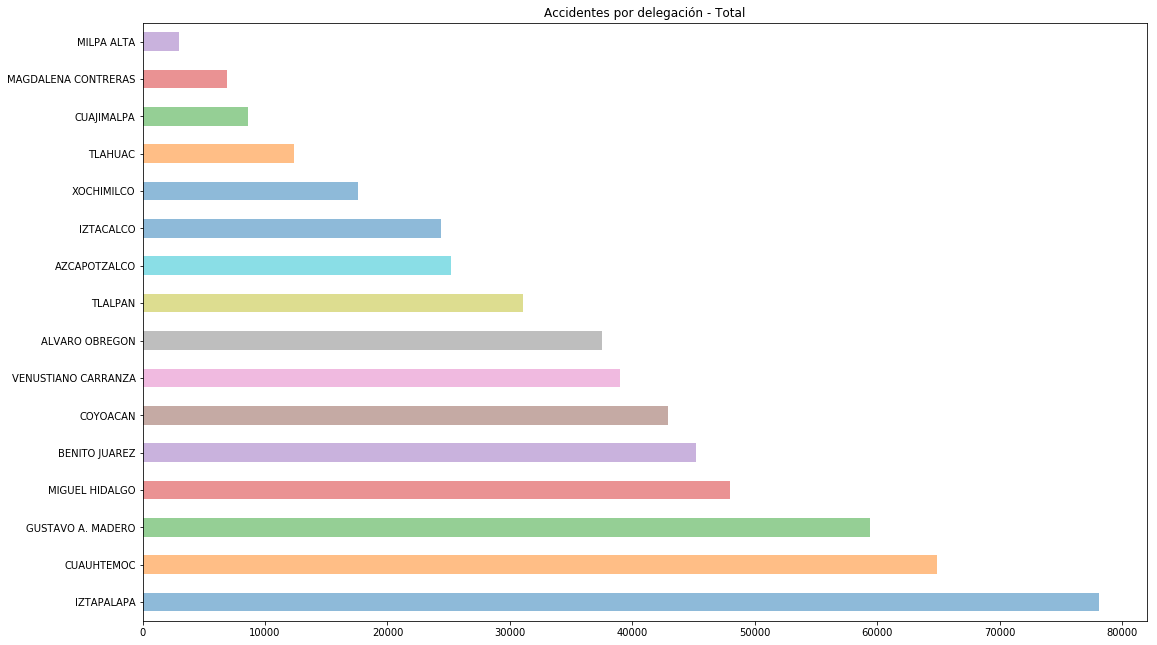

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,11))

dV.delegacion_inicio.value_counts().plot(kind='barh', alpha=0.5)
plt.title('Accidentes por delegación - Total')
#plt.subplot2grid((2,3), (0,1))
#dataC.delegacion_inicio.value_counts(normalize=True).plot(kind='barh', alpha=0.5)
#plt.title('Accidentes por delegación- Porcentaje total')
plt.show() 

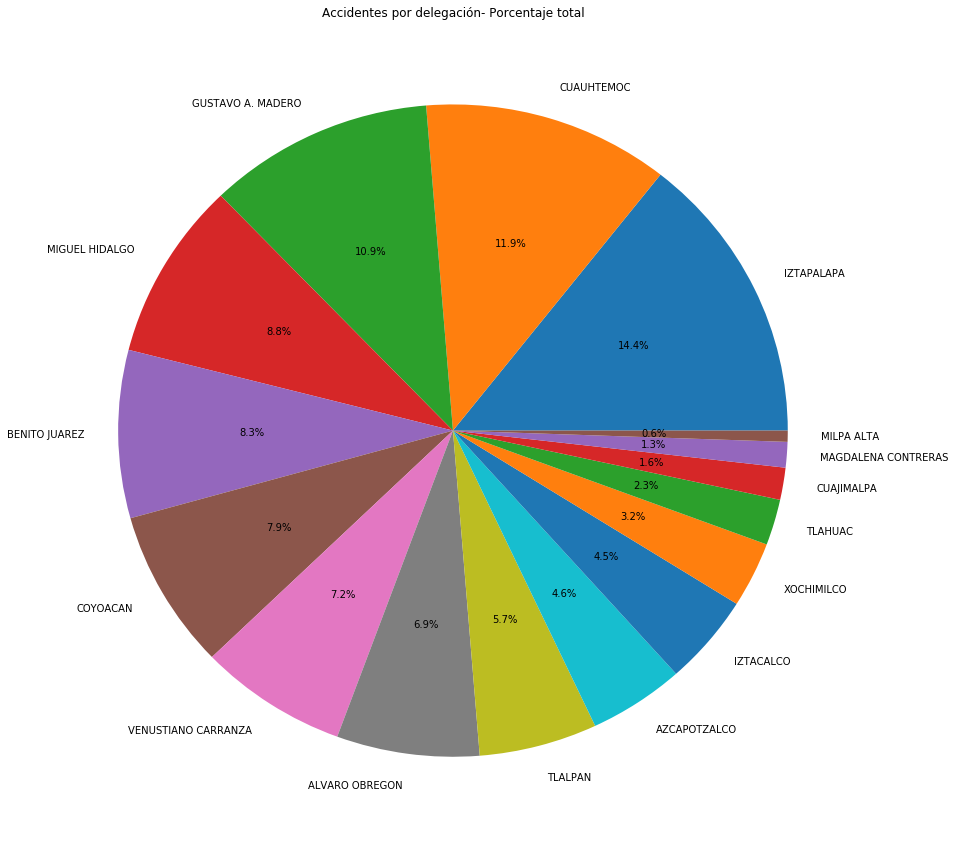

In [14]:
plt.figure(figsize=(15,15))
dV.delegacion_inicio.value_counts(normalize=True).plot.pie(y='mass', autopct='%1.1f%%')
plt.title('Accidentes por delegación- Porcentaje total')
plt.axis('off')
plt.show() 

Ahora vemos los accidentes que suceden por dia y lo graficamos...

In [15]:
dV.dia_semana.value_counts()

Viernes      88696
Sábado       81378
Jueves       78741
Miércoles    78465
Martes       77131
Lunes        72800
Domingo      66865
Name: dia_semana, dtype: int64

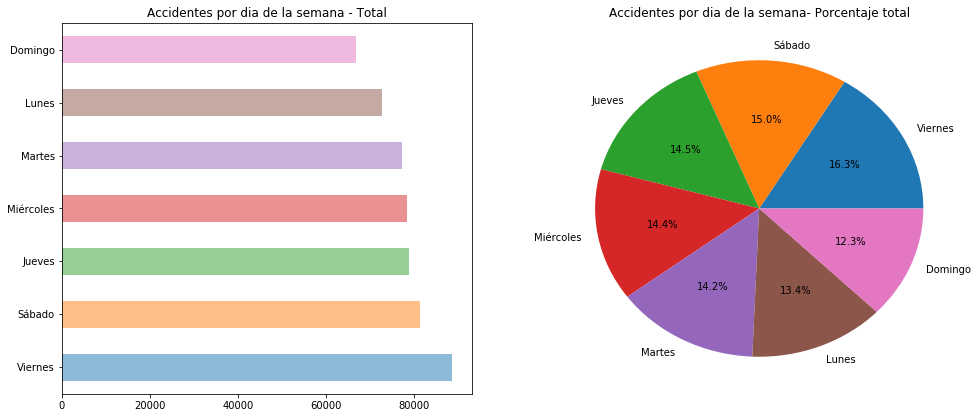

In [16]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
plt.subplot2grid((2,3), (0,0))
dV.dia_semana.value_counts().plot(kind='barh', alpha=0.5)
plt.title('Accidentes por dia de la semana - Total')

plt.subplot2grid((2, 3), (0,1))
dV.dia_semana.value_counts(normalize=True).plot.pie(y='mass', autopct='%1.1f%%')
plt.title('Accidentes por dia de la semana- Porcentaje total')
plt.axis('off')
plt.show() 

In [17]:
dV["timestamp"]=pd.to_datetime(dV.hora_creacion)

In [18]:
dV["hora"]=dV["timestamp"].dt.hour

In [19]:
dV

folio fecha_creacion hora_creacion dia_semana  \
5        C5/170620/04134     20/06/2017      15:44:49     Martes   
8        C5/170620/01232     20/06/2017      07:51:50     Martes   
9        C5/170620/04654     20/06/2017      16:52:03     Martes   
10       C5/170620/02314     20/06/2017      11:07:31     Martes   
11       C5/170620/00189     20/06/2017      00:44:07     Martes   
17       C5/170620/06257     20/06/2017      20:22:24     Martes   
19       C5/170619/07290     19/06/2017      21:40:24      Lunes   
21       C5/170620/05019     20/06/2017      17:42:57     Martes   
23       C5/170620/04123     20/06/2017      15:42:29     Martes   
24       C5/170620/05276     20/06/2017      18:15:32     Martes   
26       C5/170620/04106     20/06/2017      15:40:56     Martes   
31       C5/170620/01475     20/06/2017      08:42:16     Martes   
41       IZ/170620/01473     20/06/2017      08:42:19     Martes   
47       C5/170620/06082     20/06/2017      20:01:09     Martes   
50       C5/170620/01419     20/06/2017      08:30:04     Martes   
51       C5/170620/01240     20/06/2017      07:51:38     Martes   
53       C5/170620/04741     20/06/2017      17:04:12     Martes   
55       C5/170620/01356     20/06/2017      08:17:56     Martes   
56       C5/170620/02814     20/06/2017      12:25:53     Martes   
59       CH/170620/02822     20/06/2017      12:27:11     Martes   
61       C5/170620/01322     20/06/2017      08:11:57     Martes   
67       C5/170620/03081     20/06/2017      13:07:43     Martes   
68       C5/170620/01494     20/06/2017      08:48:54     Martes   
70       C5/170620/05215     20/06/2017      18:07:55     Martes   
72       C5/170620/01818     20/06/2017      09:47:13     Martes   
87       C5/170620/04182     20/06/2017      15:48:53     Martes   
91       C5/170620/04693     20/06/2017      16:57:25     Martes   
93       C5/170620/04787     20/06/2017      17:11:01     Martes   
94       C5/170620/06386     20/06/2017      20:41:31     Martes   
101      C5/170620/04884     20/06/2017      17:24:22     Martes   
...                  ...            ...           ...        ...   
1206101  C5/190930/02561     30/09/2019      10:54:31      Lunes   
1206104  C5/190930/05778     30/09/2019      18:02:45      Lunes   
1206108  C5/190930/06061     30/09/2019      18:39:38      Lunes   
1206110  C5/190930/00077     30/09/2019      00:12:44      Lunes   
1206113  C5/190930/04627     30/09/2019      15:36:04      Lunes   
1206114  C5/190930/04972     30/09/2019      16:17:20      Lunes   
1206118  C5/190930/03033     30/09/2019      11:59:08      Lunes   
1206119  C5/190930/02873     30/09/2019      11:39:41      Lunes   
1206121  C5/190930/06275     30/09/2019      19:04:22      Lunes   
1206122  IZ/190930/02979     30/09/2019      11:53:01      Lunes   
1206123  C5/190929/09151     29/09/2019      21:53:31    Domingo   
1206131  C5/190930/02488     30/09/2019      10:45:39      Lunes   
1206136  C5/190930/02640     30/09/2019      11:06:31      Lunes   
1206138  C5/190929/09270     29/09/2019      22:12:05    Domingo   
1206140  C5/190930/03173     30/09/2019      12:21:59      Lunes   
1206154  IZ/190930/06290     30/09/2019      19:09:08      Lunes   
1206164  C5/190930/06553     30/09/2019      19:41:31      Lunes   
1206166  C5/190930/07471     30/09/2019      21:45:12      Lunes   
1206169  CH/190930/05559     30/09/2019      17:32:59      Lunes   
1206170  C5/190930/00791     30/09/2019      05:25:10      Lunes   
1206171  C5/190930/07577     30/09/2019      22:00:25      Lunes   
1206172  GA/190930/01922     30/09/2019      09:20:46      Lunes   
1206174  C5/190930/03571     30/09/2019      13:15:34      Lunes   
1206176  C5/190929/08519     29/09/2019      20:18:42    Domingo   
1206177  C5/190930/00796     30/09/2019      05:25:43      Lunes   
1206178  C5/190930/05117     30/09/2019      16:36:23      Lunes   
1206181  C5/190930/06894     30/09/2019      20:27:44      Lunes   
1206183

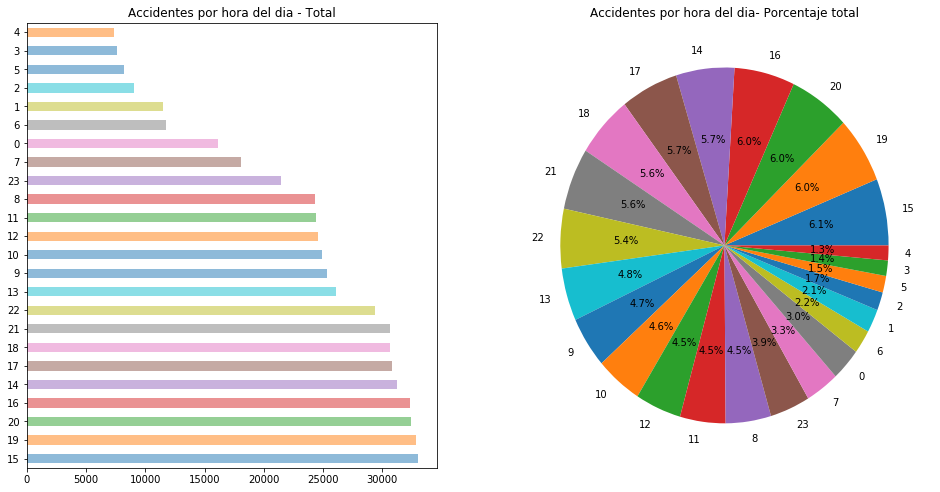

In [40]:
fig=plt.figure(figsize=(25,18))
plt.subplot2grid((2,3), (0,0))
dV.hora.value_counts().plot(kind='barh', alpha=0.5)
plt.title('Accidentes por hora del dia - Total')

plt.subplot2grid((2, 3), (0,1))
dV.hora.value_counts(normalize=True).plot.pie(y='mass', autopct='%1.1f%%')
plt.title('Accidentes por hora del dia- Porcentaje total')
plt.axis('off')
plt.show() 

Y ahora graficamos los accidentes diarios reportados...

Text(0,0.5,'Numbero de accidentes')

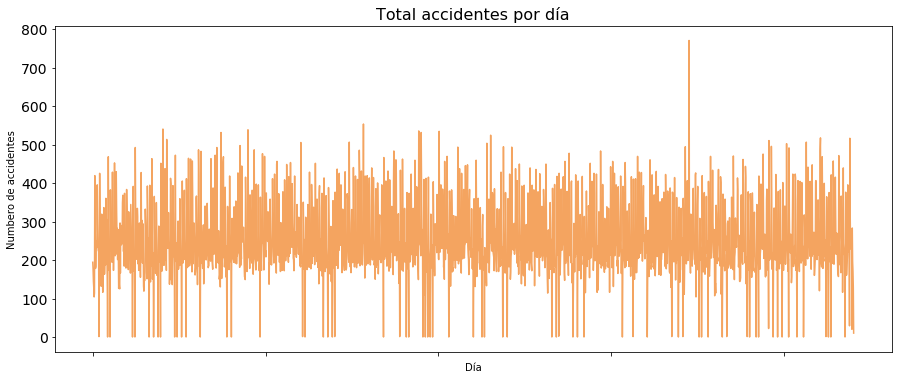

In [21]:
fechas=dV.groupby("fecha_creacion").size()
plt.figure(figsize=(15,6))
mediaD=dV.groupby("fecha_creacion").size().mean()
plt.tick_params(labelsize=14)
fechas.plot(label='Accidents per day', color='sandybrown')
plt.title('Total accidentes por día', fontsize=16)
plt.xlabel('Día')
plt.ylabel('Numbero de accidentes')



In [22]:
mediaD

247.08265213442326

#### Ahora seleccionamos los datos del 2018 y de diciembre del 2018 para continuar con el análisis

In [23]:
#Datos de Diciembre del 2018
dV2018=dV[dV['año_cierre'] == 2018]
dV18=dV2018[dV2018['mes_cierre'] == 'Diciembre']


Ahora graficamos los accidentes diarios durante el 2018

Text(0,0.5,'Numbero de accidentes')

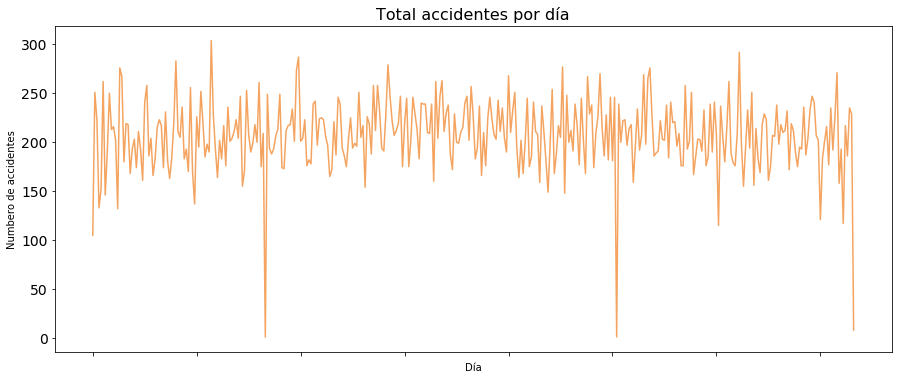

In [24]:

fechas=dV2018.groupby("fecha_creacion").size()
plt.figure(figsize=(15,6))
media=dV2018.groupby("fecha_creacion").size().mean()
plt.tick_params(labelsize=14)
fechas.plot(label='Accidents per day', color='sandybrown')
plt.title('Total accidentes por día', fontsize=16)
plt.xlabel('Día')
plt.ylabel('Numbero de accidentes')

In [25]:
media

207.31062670299727

### Los lugares donde mas accidentes ocurren

In [26]:
u=pd.DataFrame(dV.groupby(["latitud", "longitud"]).size())

In [27]:
u.columns=["fre"]
u

fre
latitud   longitud       
19.094020 -99.213130    1
19.095427 -99.209297    9
          -99.209297    4
19.098213 -99.209672    1
          -99.209671    4
          -99.209671   10
19.100101 -99.201195    5
          -99.201195    8
19.104129 -99.203068    2
19.104130 -99.203072    6
          -99.203072    1
19.104902 -99.193239    4
          -99.193237    2
          -99.193237    6
19.108931 -99.195023    7
          -99.195023    4
          -99.195022    9
          -99.195022    1
19.108973 -99.195021    1
19.109047 -99.195254    1
19.109770 -99.192800    1
          -99.192800    7
19.109985 -99.185509    3
          -99.185509    8
19.109986 -99.185505    4
19.110242 -99.185896    1
19.111237 -99.190006    1
19.113686 -99.190819    8
          -99.190821    5
          -99.190819    5
...                   ...
19.575330 -99.132580    2
19.575350 -99.133430    1
19.575510 -99.133580    1
19.575530 -99.129740    1
19.575610 -99.131060    3
19.575830 -99.133890    1
19.576000 -99.134120    1
19.576110 -99.130820    1
19.576210 -99.130740    2
19.576320 -99.130650    4
          -99.130650    2
19.576330 -99.134770    1
19.576459 -99.130671    7
19.576610 -99.130500    5
          -99.130500    6
19.576710 -99.129180    2
          -99.129180    1
19.576720 -99.134840    3
19.576730 -99.129620    3
          -99.129620    1
19.576900 -99.132660    1
19.576920 -99.128320    1
          -99.128320    1
19.577240 -99.133610    1
19.577280 -99.132510    1
19.577940 -99.134300    1
19.578570 -99.130180    1
19.579190 -99.131270    1
19.579280 -99.130030    1
19.579320 -99.130380    1

[98745 rows x 1 columns]

In [28]:
u=u.sort_values(by='fre', ascending=False)
u=u.iloc[0:50]


In [29]:
u.reset_index(drop=False, inplace=True)

In [30]:
u

latitud   longitud  fre
0   19.371680 -99.080240  565
1   19.304320 -99.087140  482
2   19.347021 -99.180646  461
3   19.363170 -99.057400  362
4   19.356630 -99.086560  348
5   19.318550 -99.075510  283
6   19.305460 -99.205810  277
7   19.352570 -99.014970  268
8   19.266060 -99.115420  239
9   19.385160 -99.186590  236
10  19.493380 -99.145920  229
11  19.376440 -99.059260  221
12  19.453160 -99.130950  215
13  19.468410 -99.176150  202
14  19.422330 -99.120560  200
15  19.350930 -99.074940  191
16  19.292720 -99.125550  190
17  19.344520 -99.061140  189
18  19.479010 -99.097550  189
19  19.341070 -99.137490  188
20  19.294470 -99.102490  186
21  19.385190 -99.183080  186
22  19.320970 -99.220970  185
23  19.361140 -99.040460  182
24  19.352450 -99.014730  181
25  19.398490 -99.058300  180
26  19.295780 -99.100530  179
27  19.363110 -99.056770  179
28  19.304320 -99.087140  179
29  19.318330 -99.075550  178
30  19.384770 -99.191040  178
31  19.493590 -99.146810  173
32  19.379410 -99.095590  170
33  19.481070 -99.127890  170
34  19.318390 -99.075650  170
35  19.457260 -99.148880  169
36  19.323080 -98.957880  167
37  19.400030 -99.184980  167
38  19.289570 -99.217560  166
39  19.342580 -99.148890  164
40  19.345300 -99.020940  162
41  19.454790 -99.138330  162
42  19.407670 -99.184080  161
43  19.331520 -99.210330  161
44  19.392430 -99.239100  161
45  19.357160 -99.144040  160
46  19.345450 -99.170180  160
47  19.487450 -99.124490  159
48  19.344600 -99.061290  159
49  19.283860 -99.217540  159

In [31]:
import plotly.graph_objects as go
from matplotlib.pyplot import figure
mapbox_access_token = open("mapbox_access_token").read()
fig = go.Figure(go.Scattermapbox(
        lat=u.latitud,
        lon=u.longitud,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        text=['Ciudad de México'],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=19.38,
            lon=-99.15059
        ),
        pitch=0,
        
        zoom=9.5
        
    )
)
fig.show()


#### Selecciono los datos de latitud y longitud para hacer un análisis basado en las localizaciones de los accidentes.

In [32]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Data={'lat': dV2018['latitud'],
      'lon': dV2018['longitud']
     }
df=DataFrame(Data, columns=['lat', 'lon'])
df.head()

lat       lon
2718  19.50035 -99.14949
2719  19.44754 -99.19217
2723  19.29446 -99.21539
2741  19.39840 -99.17091
2742  19.27406 -99.12009

In [33]:
df.shape

(76083, 2)

[19.50035    19.44754002 19.29446001 ... 19.421611   19.30824
 19.38915999]


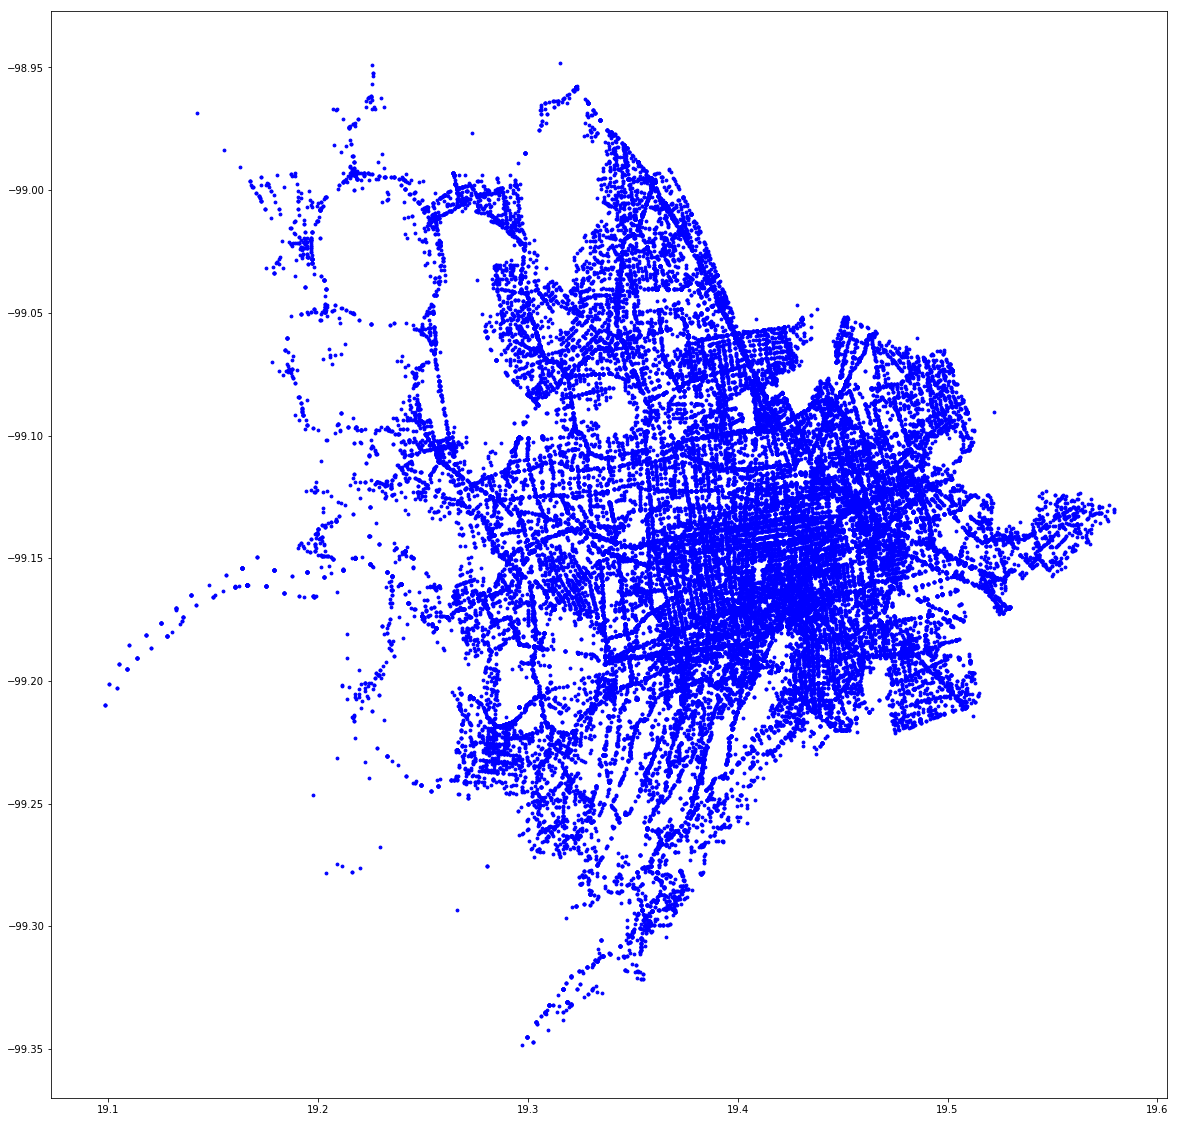

In [34]:
f1 = df['lat'].values
f2 = df['lon'].values
print(f1)
plt.figure(figsize=(20,20))
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='blue', s=8)

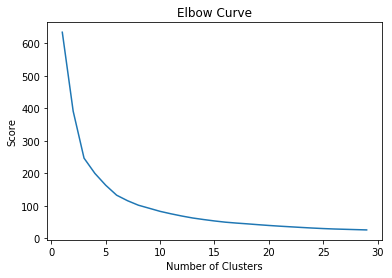

In [35]:
from sklearn.cluster import KMeans
Nc=  range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [-1*kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [36]:
k=10
# Number of clusters
kmeans = KMeans(n_clusters=k)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [37]:
print(centroids)

[[ 19.46375262 -99.10902598]
 [ 19.29906842 -99.11439037]
 [ 19.42618366 -99.17275928]
 [ 19.35674721 -99.03551542]
 [ 19.36436534 -99.17132738]
 [ 19.4961575  -99.1640609 ]
 [ 19.27797238 -99.18933727]
 [ 19.35068282 -99.25164973]
 [ 19.3986395  -99.09876454]
 [ 19.26277666 -99.0286293 ]]


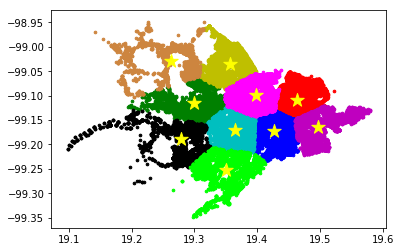

In [38]:
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'lime', 'fuchsia', 'peru']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='yellow')

In [39]:
import plotly.graph_objects as go
from matplotlib.pyplot import figure
mapbox_access_token = open("mapbox_access_token").read()
fig = go.Figure(go.Scattermapbox(
        lat=centroids[:, 0],
        lon=centroids[:, 1],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        text=['Ciudad de México'],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=19.38,
            lon=-99.15059
        ),
        pitch=0,
        
        zoom=9.5
        
    )
)
fig.show()
